In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd


In [3]:
pip install streamlit

     |████████████████████████████████| 8.6 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 717 kB/s eta 0:00:01
     |████████████████████████████████| 207 kB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 857 kB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 28.4 MB 6.4 MB/s eta 0:00:011
     |████████████████████████████████| 412 kB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 87 kB 10.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 21.5 MB/s eta 0:00:01
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protob

In [4]:
import streamlit as st

In [6]:
# Sample data for demonstration purposes
data = {
    'Player': ['Player 1', 'Player 1', 'Player 1', 'Player 2', 'Player 2', 'Player 2', 'Player 3', 'Player 3', 'Player 3'],
    'Attribute': ['Speed', 'Strength', 'Agility', 'Speed', 'Strength', 'Agility', 'Speed', 'Strength', 'Agility'],
    'Value': [7, 5, 6, 8, 6, 7, 9, 7, 8]
}


df = pd.DataFrame(data)



In [7]:
# Pivot the dataframe
pivot_df = df.pivot(index='Player', columns='Attribute', values='Value')



In [8]:
# Scale function
def scale_column(col):
    return (col - col.min()) / (col.max() - col.min())

# Scale each column
scaled_df = pivot_df.apply(scale_column)



In [9]:
# List of categories
categories = list(scaled_df.columns)
num_vars = len(categories)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Streamlit app
st.title('Player Performance Radar Chart')

# Dropdown menu for player selection
player_selected = st.selectbox('Select a player:', options=pivot_df.index)



2024-06-28 12:25:30.260 
  command:

    streamlit run /Users/lucifer/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-06-28 12:25:30.264 Session state does not function when running a script without `streamlit run`


DeltaGenerator()

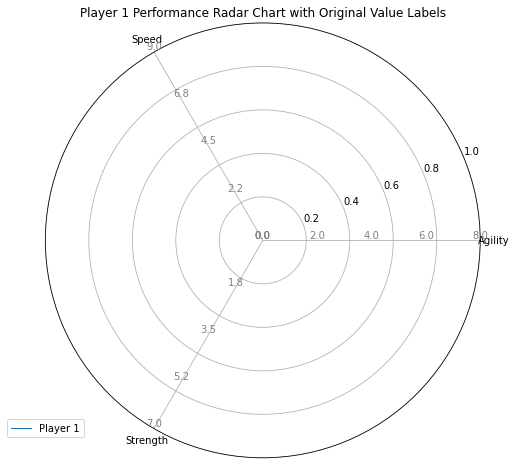

In [10]:
# Plot radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

row = scaled_df.loc[player_selected]
values = row.tolist()
values += values[:1]

ax.plot(angles, values, linewidth=1, linestyle='solid', label=player_selected)
ax.fill(angles, values, alpha=0.1)

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Add custom y-axis labels
for i, category in enumerate(categories):
    angle_rad = angles[i]
    max_val = pivot_df[category].max()
    for label in [0.0, 0.25, 0.5, 0.75, 1.0]:
        label_angle = angle_rad - (pi / num_vars)
        ax.text(angle_rad, label, f"{label * max_val:.1f}", ha='center', va='bottom', fontsize=10, color='gray')

# Set y-limits
ax.set_ylim(0, 1)

# Title and legend
plt.title(f'{player_selected} Performance Radar Chart with Original Value Labels')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot in Streamlit
st.pyplot(fig)